In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS\\FingerLakes'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read Field dataset 
Data0 = pd.read_csv('data_raw/Indices/FingerLakes.csv')

# Remove none values
Data = Data0.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B6        B7        B8       B8A  \
0  

In [5]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']

# get the summary
desc_data = Data [list].describe()

# add the standard deviation metric
desc_data.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std'] * 3)
desc_data.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std'] * 3)

# display it
desc_data

,2BDA,3BDA,NDCI,Chl-a
count,117.000000,117.000000,117.000000,117.000000
mean,0.926077,-0.071347,-0.039133,5.229865
std,0.069430,0.074212,0.036356,4.332009
min,0.796202,-0.173236,-0.113502,0.229200
25%,0.874731,-0.131772,-0.066979,2.290000
50%,0.910392,-0.092735,-0.046959,3.962000
75%,0.964004,-0.033550,-0.018529,7.060000
max,1.082229,0.110278,0.037450,24.760000
+3_std,1.134367,0.151288,0.069934,18.225893
-3_std,0.717788,-0.293982,-0.148200,-7.766163


In [6]:
# Pearson Coefficient 
corr = Data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.951575,0.960599,0.130727
3BDA,0.951575,1.000000,0.983393,0.203516
NDCI,0.960599,0.983393,1.000000,0.144573
Chl-a,0.130727,0.203516,0.144573,1.000000


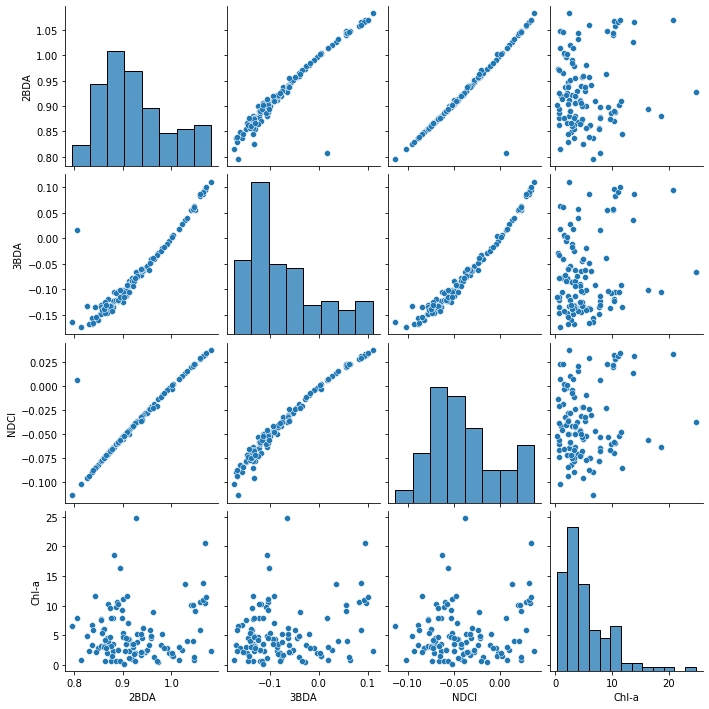

In [7]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data[list])

In [8]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = Data["Chl-a"]

In [9]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Data[X_columns[0:3]].values, i) for i in range(Data[X_columns[0:3]].shape[1])]
vif["features"] = Data[X_columns[0:3]].columns

# display VIF
vif.round()

,VIF Factor,features
0,2.0,2BDA
1,59.0,3BDA
2,65.0,NDCI


In [19]:
# Extract independent variables (X) & dependent variable (Y)
X = Data[X_columns]
X=add_constant(X)
Y = Data['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4.119
Date:                Wed, 02 Mar 2022   Prob (F-statistic):            0.00917
Time:                        15:54:05   Log-Likelihood:                -222.27
No. Observations:                  81   AIC:                             452.5
Df Residuals:                      77   BIC:                             462.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8756     18.791      1.430      0.1

In [20]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)


predicted Y: 69      4.215092
46      2.442662
58      6.558987
114     5.761847
73      5.640723
98      4.763815
31     11.401737
53      3.980806
65      3.934339
96      4.021640
95      6.821457
97      5.949494
2       5.472277
62      4.379379
110     5.329493
55      3.575290
103     3.032190
100     5.520617
66      5.067750
44      6.064657
77      6.766818
17      4.338013
81      4.694501
74      2.574476
56      3.603322
94      8.096717
35      7.055192
38      4.632817
93      4.568861
48      2.675929
33      4.880709
59      6.281226
92      3.059835
42      4.485869
10      5.670768
85      4.112389
dtype: float64


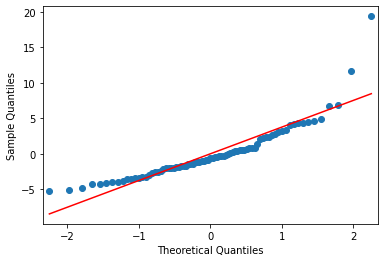

The mean of the residuals is 2.023e-15


In [21]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [22]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 22.5
MAE 3.59
RMSE 4.74


In [23]:
# MergedData: Threshold  Chl-a < 2
Data1 = Data.loc[(Data["Chl-a"] > 2)]
Data1.shape

(96, 25)

In [24]:
# get the summary
desc_data1 = Data1 [list].describe()

# add the standard deviation metric
desc_data1.loc['+3_std'] = desc_data1.loc['mean'] + (desc_data1.loc['std'] * 3)
desc_data1.loc['-3_std'] = desc_data1.loc['mean'] - (desc_data1.loc['std'] * 3)

# display it
desc_data1

,2BDA,3BDA,NDCI,Chl-a
count,96.000000,96.000000,96.000000,96.000000
mean,0.922930,-0.073282,-0.040637,6.146367
std,0.070653,0.075521,0.036988,4.258724
min,0.796202,-0.167801,-0.113502,2.022000
25%,0.868419,-0.132168,-0.069905,3.175000
50%,0.905896,-0.100478,-0.049448,4.745000
75%,0.957728,-0.040492,-0.021756,7.909000
max,1.082229,0.110278,0.037450,24.760000
+3_std,1.134888,0.153281,0.070326,18.922538
-3_std,0.710971,-0.299845,-0.151601,-6.629804


In [25]:
# Pearson Coefficient 
corr1 = Data1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.945179,0.953792,0.207248
3BDA,0.945179,1.000000,0.983052,0.273258
NDCI,0.953792,0.983052,1.000000,0.219329
Chl-a,0.207248,0.273258,0.219329,1.000000


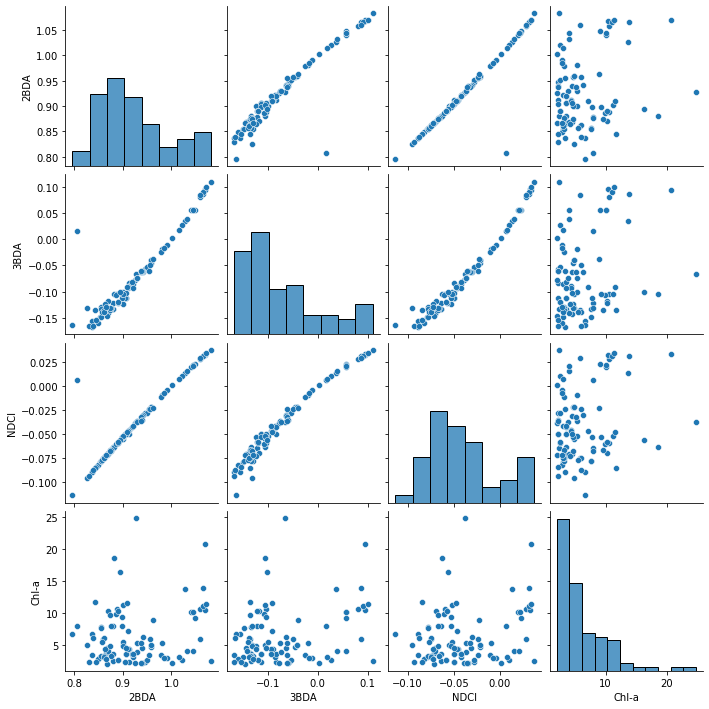

In [26]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data1[list])

In [27]:
# Extract independent variables (X) & dependent variable (Y)
X = Data1[X_columns]
X = add_constant(X)
Y = Data1['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     7.103
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           0.000347
Time:                        15:54:21   Log-Likelihood:                -187.04
No. Observations:                  67   AIC:                             382.1
Df Residuals:                      63   BIC:                             390.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        851.3044    284.548      2.992      0.0

In [28]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 46       4.426856
35      10.121409
52       6.350768
69       3.423904
95      10.580695
89       8.199784
76       6.012319
50       3.261791
98       3.838054
105     11.143124
72       4.612012
30       7.762813
112      3.350905
92       4.227004
36       9.792088
64       3.702704
45       8.109769
12       5.422020
4      182.384029
44       7.924442
62       3.089580
67       6.243483
21       2.715925
110      9.026171
116      7.349512
39       8.286732
37       7.046466
56       3.780854
104     11.056690
dtype: float64


In [29]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.06e+03
MAE 8.62
RMSE 32.6


In [30]:
# MergedData: Threshold  Chl-a < 8
Data2 = Data.loc[(Data["Chl-a"] > 8)]
Data2.shape

(23, 25)

In [31]:
# get the summary
desc_data2 = Data2 [list].describe()

# add the standard deviation metric
desc_data2.loc['+3_std'] = desc_data2.loc['mean'] + (desc_data2.loc['std'] * 3)
desc_data2.loc['-3_std'] = desc_data2.loc['mean'] - (desc_data2.loc['std'] * 3)

# display it
desc_data2

,2BDA,3BDA,NDCI,Chl-a
count,23.000000,23.000000,23.000000,23.000000
mean,0.964529,-0.025062,-0.020131,12.324000
std,0.084977,0.093199,0.043871,4.054804
min,0.843901,-0.135495,-0.084683,8.864000
25%,0.889503,-0.104556,-0.058632,10.091000
50%,0.927337,-0.065664,-0.037805,10.568000
75%,1.053191,0.068992,0.025676,12.665000
max,1.070283,0.100207,0.033933,24.760000
+3_std,1.219460,0.254534,0.111481,24.488413
-3_std,0.709598,-0.304658,-0.151743,0.159587


In [32]:
# Pearson Coefficient 
corr2 = Data2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.994939,0.999805,-0.002778
3BDA,0.994939,1.000000,0.993735,0.021173
NDCI,0.999805,0.993735,1.000000,0.002390
Chl-a,-0.002778,0.021173,0.002390,1.000000


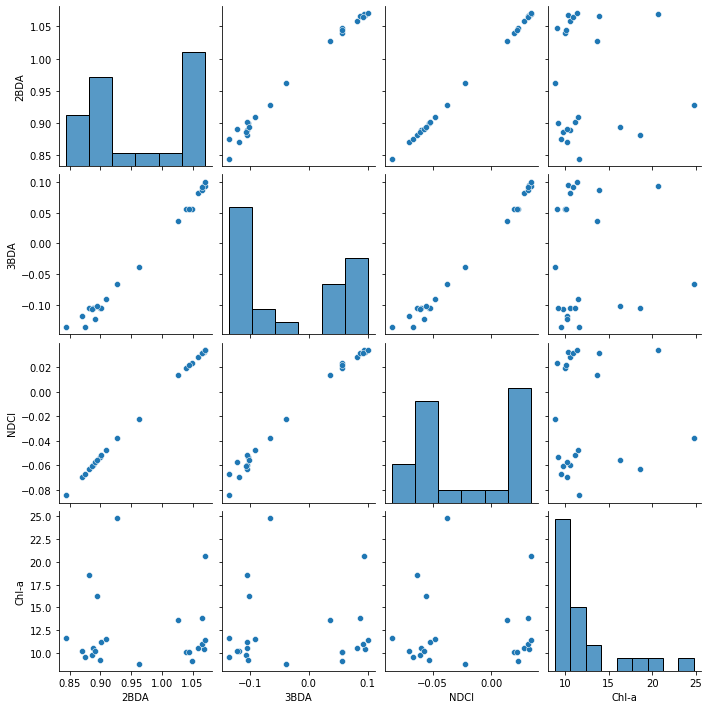

In [33]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data2[list])

In [34]:
# Extract independent variables (X) & dependent variable (Y)
X = Data2[X_columns]
X = add_constant(X)
Y = Data2['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3.598
Date:                Wed, 02 Mar 2022   Prob (F-statistic):             0.0462
Time:                        15:54:51   Log-Likelihood:                -39.858
No. Observations:                  16   AIC:                             87.72
Df Residuals:                      12   BIC:                             90.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3245.0844   1048.639      3.095      0.0

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [35]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 101    14.221912
89      7.042398
33     14.312578
69      4.395985
98     -0.828655
87      7.413934
58      9.201582
dtype: float64


In [36]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 40.5
MAE 5.14
RMSE 6.37
